**Title of Project**

Handwritten Digit Prediction

**Objective**

The objective of project is to predict the Digit which is handwritten and is given as input. It is used to provide the ability to machines to recognize human handwritten digits

Input : Handwritten digit,
Output: Prediction of the digit

**Data Source**:
sklearn datasets

**Import Library**

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Import Data**

In [153]:
from sklearn.datasets import load_digits

In [154]:
df=load_digits()

In [155]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

**Describe Data**

The input data loaded has the handwritten digits visually analysed and represented in the graphical or analytical formats.

**Data Visualization**

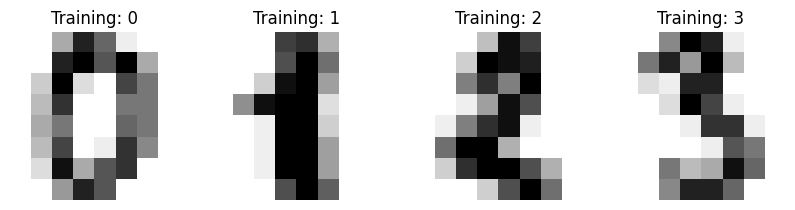

In [156]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" %label)

**Data Preprocessing**

In [157]:
df.images.shape

(1797, 8, 8)

In [158]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [159]:
df.images[0].shape

(8, 8)

In [160]:
len(df.images)

1797

In [161]:
m_samples=len(df.images)
data=df.images.reshape((m_samples, -1))

In [162]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [163]:
data[0].shape

(64,)

In [164]:
data.shape

(1797, 64)

**Scaling Image Data**

In [165]:
data.min()

0.0

In [166]:
data.max()

16.0

In [167]:
data=data/16

In [168]:
data.min()

0.0

In [169]:
data.max()

1.0

In [170]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [173]:
X_train.shape

(1257, 64)

In [174]:
X_test.shape

(540, 64)

In [175]:
y_train.shape

(1257,)

In [176]:
y_test.shape

(540,)

**Random Forest Model**

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf=RandomForestClassifier()

In [179]:
rf.fit(X_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [180]:
y_pred=rf.predict(X_test)

In [181]:
y_pred

array([2, 4, 2, 7, 3, 3, 1, 0, 3, 5, 2, 6, 7, 5, 7, 7, 7, 0, 3, 9, 6, 8,
       0, 7, 4, 9, 7, 3, 6, 2, 2, 6, 1, 6, 3, 3, 3, 2, 7, 3, 8, 5, 7, 3,
       0, 4, 4, 1, 0, 0, 8, 1, 3, 2, 3, 4, 5, 3, 7, 7, 5, 4, 8, 7, 6, 9,
       6, 1, 4, 9, 1, 7, 9, 4, 1, 0, 6, 0, 1, 9, 0, 8, 6, 1, 3, 6, 8, 7,
       1, 7, 2, 3, 8, 6, 9, 7, 2, 2, 3, 9, 9, 8, 2, 3, 2, 4, 3, 9, 9, 6,
       6, 0, 2, 4, 9, 5, 7, 6, 9, 5, 2, 5, 1, 5, 0, 6, 5, 8, 2, 9, 3, 4,
       1, 1, 1, 7, 3, 9, 0, 6, 0, 5, 6, 5, 0, 6, 1, 0, 4, 5, 7, 2, 7, 0,
       6, 7, 8, 7, 1, 8, 6, 5, 8, 8, 7, 0, 8, 3, 2, 0, 5, 2, 7, 5, 7, 7,
       3, 6, 6, 8, 9, 3, 2, 6, 3, 8, 5, 8, 7, 1, 4, 8, 3, 1, 5, 8, 4, 7,
       5, 7, 0, 4, 0, 6, 6, 9, 1, 3, 4, 3, 6, 3, 9, 3, 9, 8, 7, 3, 7, 9,
       5, 4, 8, 9, 1, 4, 3, 6, 3, 2, 0, 3, 7, 6, 3, 9, 6, 5, 4, 6, 1, 5,
       6, 0, 5, 7, 6, 3, 7, 4, 0, 5, 0, 9, 3, 7, 7, 8, 5, 0, 8, 1, 3, 5,
       5, 1, 9, 6, 5, 9, 7, 8, 5, 6, 5, 5, 6, 8, 7, 1, 8, 6, 7, 1, 9, 6,
       0, 4, 7, 0, 6, 4, 9, 8, 0, 0, 1, 2, 8, 4, 2,

**Model Accuracy**

In [182]:
from sklearn.metrics import confusion_matrix, classification_report

In [183]:
confusion_matrix(y_test, y_pred)

array([[57,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 62,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  1,  0,  0,  3],
       [ 1,  0,  0,  0,  0,  0, 66,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 63,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  0,  0, 46,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 55]])

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       0.98      1.00      0.99        41
           2       0.96      0.98      0.97        47
           3       1.00      0.98      0.99        63
           4       0.98      1.00      0.99        43
           5       1.00      0.92      0.96        52
           6       0.99      0.99      0.99        67
           7       1.00      1.00      1.00        63
           8       0.96      0.92      0.94        50
           9       0.93      0.96      0.95        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



**Explanation**

In the Pattern Recognition field, growing interest has
been shown in recent years for Multiple Classifier Systems
and particularly for Bagging, Boosting and Random Subspaces. Those methods aim at inducing an ensemble of
classifiers by producing diversity at different levels. Following this principle, Breiman has introduced in 2001 another family of methods called Random Forest. Our work
aims at studying those methods in a strictly pragmatic approach, in order to provide rules on parameter settings for
practitioners. For that purpose we have experimented the
Forest-RI algorithm, considered as the Random Forest reference method, on the MNIST handwritten digits database.
In this paper, we describe Random Forest principles and review some methods proposed in the literature. We present
next our experimental protocol and results. We finally draw
some conclusions on Random Forest global behavior according to their parameter tuning.